In [37]:
import regionmask
import matplotlib.pyplot as plt
import numpy as np

In [85]:
australia = regionmask.defined_regions.natural_earth.countries_50.__getitem__('Australia')

numbers = [0]
names = ['Australia']
abbrevs = ['AU']

AUmask = regionmask.Regions_cls('AUmask', numbers, names, abbrevs, [australia.polygon])

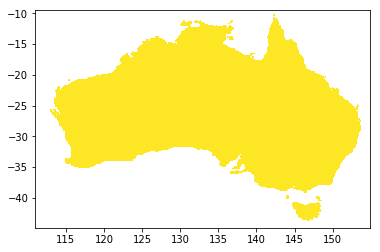

1 'AUmask' Regions ()
AU

In [95]:
lon = np.arange(111, 155, 0.1)
lat = np.arange(-9.5, -45, -0.1)

mask = AUmask.mask(lon, lat)
mask_ma = np.ma.masked_invalid(mask)

plt.pcolormesh(lon, lat, mask_ma, cmap='viridis_r');
plt.show()
AUmask

All NaN?  False


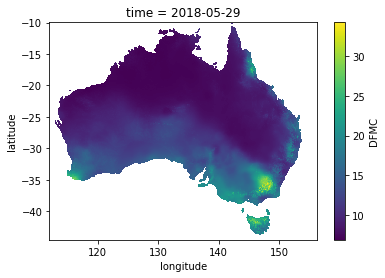

In [94]:
import xarray as xr

with xr.open_dataset('/Scratch/DataSources/geoserver_data/FuelModels/Dead_FM/DFMC/DFMC_20180529.nc') as ds:
    dm = ds['DFMC'].isel(time=0)
    mask = AUmask.mask(dm['longitude'], dm['latitude'])
    
    
    print('All NaN? ',np.all(np.isnan(mask)))
    mask_ma = np.ma.masked_invalid(mask)
    dm.where(mask_ma == 0).plot()
    plt.show()

In [71]:
countries['Australia']

Region: Australia (AU / 225)
center: [ 134.49100008  -25.73288704]

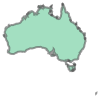

In [96]:
australia.polygon


In [101]:
import fiona
from fiona.crs import from_epsg

schema = { 'geometry': 'Point', 'properties': { 'name': 'str' } }

from_epsg(3857)
# {'init': 'epsg:3857', 'no_defs': True}

{'init': 'epsg:3857', 'no_defs': True}

In [105]:
with fiona.open('your_shapefile.shp', 'w', crs=from_epsg(3857), driver='ESRI Shapefile', schema=schema) as output:
    for point in :
        output.write({
            'properties': {
                'name': point['properties']['name']
            },
            'geometry': mapping(shape(point['geometry']))
        })

AttributeError: 'MultiPolygon' object has no attribute 'geometry'